In [38]:
# Importando o DataFrame
import pandas as pd

data_path = "../chalearn_dataset"

data_training = pd.read_csv(f"{data_path}/train/extraversion_data.csv")
df_training = pd.DataFrame.from_dict(data_training)

df_training.head(10)

,Unnamed: 0,extraversion
0,zEyRyTnIw5I.005.mp4,0
1,nskJh7v6v1U.004.mp4,0
2,eHcRre1YsNA.000.mp4,0
3,VuadgOz6T7s.000.mp4,0
4,7nhJXn9PI0I.001.mp4,0
5,tEQEKN07KgQ.001.mp4,0
6,gsleSGEZHAs.004.mp4,0
7,kn6I8LdQFN0.004.mp4,0
8,cA43Gfcg0QA.000.mp4,0
9,pZxqWp0e-Ik.000.mp4,0


## Trabalhando com Vídeo

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
# Extrai um número fixo de frames igualmente espaçados de um vídeo
def extract_video_frames(video_name, data_path, n=10, dim=(224, 224)):  
    video_path = data_path + video_name
    cap = cv2.VideoCapture(video_path)
    frames = []
    length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    jump_size = int(length // number_of_frames)
    for _ in range(number_of_frames):
        ret, frame = cap.read()
        frames.append(cv2.cvtColor(cv2.resize(frame, dim), cv2.COLOR_BGR2RGB))
        for __ in range(jump_size - 1):
          cap.grab()
    return np.array(frames)

Número de frames: 10
Formato dos frames: (224, 224, 3)
Frames extraídos:


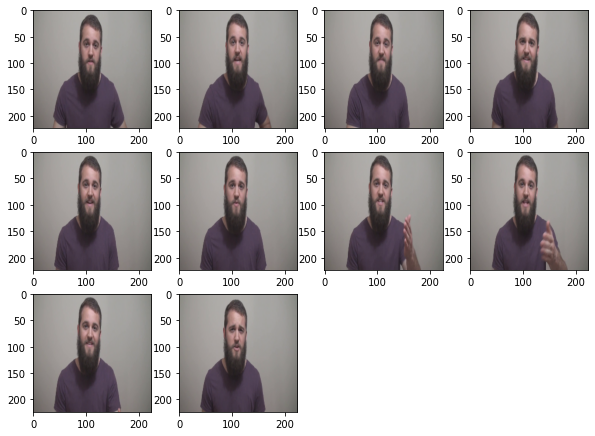

In [5]:
# Testando a função extract_video_frames e analisando a sua saída
video_name = "be0DQawtVkE.000.mp4"
video_data_path = f"{data_path}/train/"
number_of_frames=10

frames = extract_video_frames(video_name, video_data_path, number_of_frames)
print(f"Número de frames: {frames.shape[0]}\nFormato dos frames: {frames.shape[1:]}")

# Plotando o resultado:
print("Frames extraídos:")
fig = plt.figure(figsize=(10, 10))
rows = 4
columns = 4
for _ in range(number_of_frames):
    fig.add_subplot(rows, columns, _ + 1)
    plt.imshow(frames[_])

### Criando um objeto do tipo Layer que receberá o nome de uma imagem e retornará os frames extraídos

Deve ser conectado após a layer de input

In [66]:
#Importações necessárias para o funcionamento da Classe
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras import layers

# Extrator de Frames
class FramesExtractor(layers.Layer):
    '''
    data_path = caminho do diretório no qual os vídeos estão inseridos
    number_of_frames = número de frames a ser extraído a cada iteração
    dim = dimensões da imagem no formato (altura, largura)
    '''
    def __init__(self, data_path, number_of_frames=10, dim=(224, 224)):
        super(FramesExtractor, self).__init__()
        self.data_path = data_path
        self.number_of_frames = number_of_frames
        self.dim= dim
        

    '''
    videos_names = vetor com nomes de vídeos a serem precessados
    
    retorna um array com os frames extrapidos
    '''
    def call(self, videos_names):
        batch_size = videos_names.shape[0]
        frames = []
        for i in range(batch_size):
            video_path = self.data_path + videos_names[i]
            cap = cv2.VideoCapture(video_path)
            length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
            jump_size = int(length // self.number_of_frames)
            for _ in range(self.number_of_frames):
                ret, frame = cap.read()
                frames.append(cv2.cvtColor(cv2.resize(frame, self.dim), cv2.COLOR_BGR2RGB))
                for __ in range(jump_size - 1):
                  cap.grab()
        return tf.reshape(np.array(frames), [batch_size, self.number_of_frames, self.dim[0], self.dim[1], 3])
    
    def show(self, videos_names):
        frames = self.call(videos_names)
        batch_size = frames.shape[0]
        print(f"Batch Size = {batch_size}")
        print(f"Número de frames: {frames.shape[1]}\nFormato dos frames: {frames.shape[2:]}")

        # Plotando o resultado:
        print("Frames extraídos:")
        for b in range(batch_size):
            fig = plt.figure(figsize=(10, 10))
            rows = 4
            columns = 4
            for _ in range(self.number_of_frames):
                fig.add_subplot(rows, columns, _ + 1)
                plt.imshow(frames[b][_])

In [69]:
# Testando a classe acima
# Exemplo para alguém classificado como extrovertido
videos_names = np.array(["rG8D-A2F8xg.004.mp4", "tEQEKN07KgQ.001.mp4","pZxqWp0e-Ik.000.mp4", "cA43Gfcg0QA.000.mp4"])
# videos_names = np.array(["rG8D-A2F8xg.004.mp4"])
video_data_path = f"{data_path}/train/"
number_of_frames=16

frames_extractor = FramesExtractor(video_data_path, number_of_frames)

Batch Size = 4
Número de frames: 16
Formato dos frames: (224, 224, 3)
Frames extraídos:


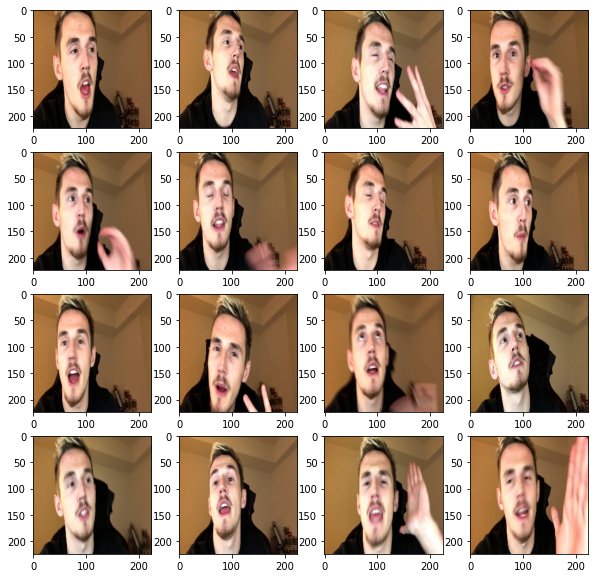

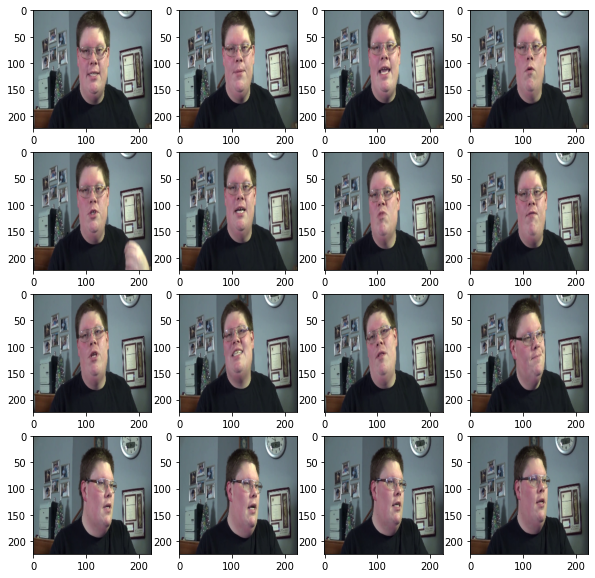

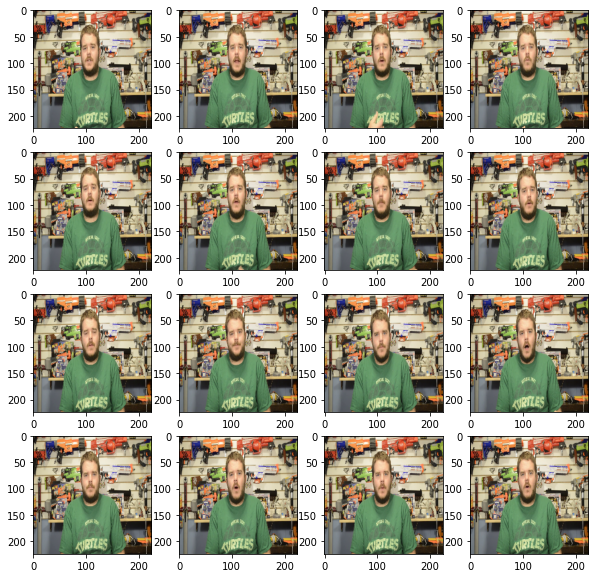

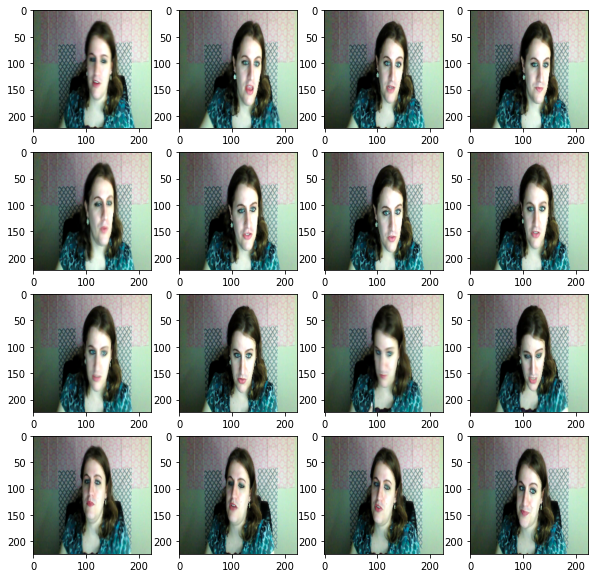

In [70]:
frames_extractor.show(videos_names)

Número de frames: 16
Formato dos frames: (224, 224, 3)
Frames extraídos:


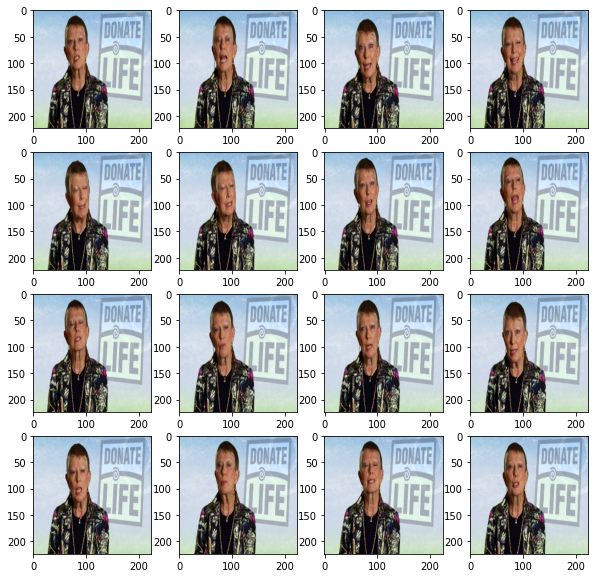

In [25]:
# Exemplo para alguém classificado como introvertido
video_name = "zEyRyTnIw5I.005.mp4"
frames_extractor.show(video_name)